In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import glob

In [2]:
def file_list(folder):
    files = glob.glob(folder)
    sample_names =[]
    for file in files:
        sample_names.append(file[:])
    
    return sample_names

sample_name1 = file_list("./data/1ko/*.csv")

print(sample_name1)

i=-1

['./data/1ko\\2022-11-04-17-19-18_3v58.csv', './data/1ko\\2022-11-08-18-25-29_3v58.csv', './data/1ko\\2022-11-08-18-46-45_3v58.csv', './data/1ko\\2022-11-08-18-49-42_3v58.csv', './data/1ko\\2022-11-08-19-11-23_3v58.csv', './data/1ko\\2022-11-08-19-39-28_3v58.csv', './data/1ko\\2022-11-08-20-02-19_3v58.csv', './data/1ko\\2022-11-08-20-37-57_3v58.csv', './data/1ko\\2022-11-08-20-55-41_3v58.csv', './data/1ko\\2022-11-08-21-00-50_3v58.csv', './data/1ko\\2022-11-08-21-02-47_3v58.csv', './data/1ko\\2022-11-08-21-04-14_3v58.csv', './data/1ko\\2022-11-08-21-06-35_3v58.csv', './data/1ko\\2022-11-08-21-09-27_3v58.csv']


In [3]:
# file
file_drive = sample_name1[i]
df1 = pd.read_csv(file_drive, index_col=0)
sample_name = file_drive[-28:-4]
print(sample_name)
df1.head()

2022-11-08-21-09-27_3v58


,Time,humidity,temperature,vpp_sum1,vpp_sum2,delay_slow,delay_fast,delay_pp_slow,delay_pp_fast,Ch1_word,Ch2_word,Ch1_Amp,Ch2_Amp
0,2022/11/08 21:07:44,21.791077,35.888367,466317.0,675159.0,3824.427603,1730.503807,0.0,0.0,3.248699e+15,1.619669e+15,13.6,14.6
1,2022/11/08 21:07:45,21.759033,35.904388,466050.0,681023.0,3830.535082,1727.756118,0.0,0.0,3.248699e+15,1.619669e+15,13.6,14.6
2,2022/11/08 21:07:46,21.786499,35.901718,465408.0,679800.0,3823.862312,1733.953886,0.0,0.0,3.248699e+15,1.619669e+15,13.6,14.6
3,2022/11/08 21:07:47,21.797180,35.912399,464847.0,678021.0,3807.497998,1746.473635,0.0,0.0,3.248699e+15,1.619669e+15,13.6,14.6
4,2022/11/08 21:07:49,21.789551,35.939102,464751.0,677527.0,3794.927548,1755.569388,0.0,0.0,3.248699e+15,1.619669e+15,13.6,14.6


In [4]:
time1 = pd.to_datetime(df1["Time"]) 
time1 = time1.dt.round("s")

time1[len(time1)-1]

Timestamp('2022-11-08 21:09:27')

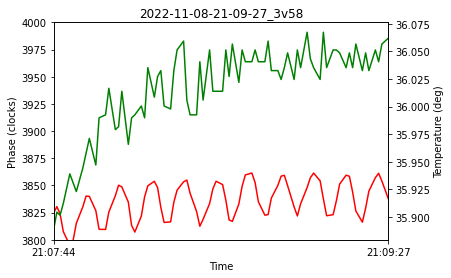

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(3800,4000)
#ax2.set_ylim(15,30)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

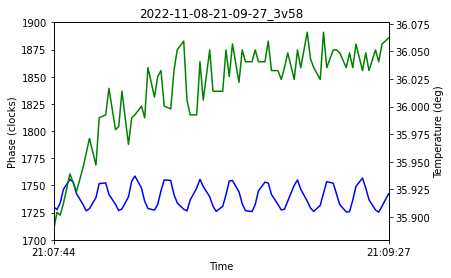

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1700,1900)
#ax2.set_ylim(15,30)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

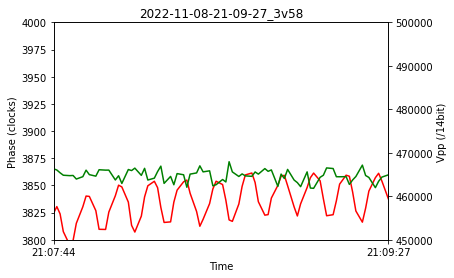

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(3800,4000)
ax2.set_ylim(450000,500000)

ax2.plot(time1, df1["vpp_sum1"], color='g')
ax2.plot(time1, df1["vpp_sum2"], color='g')
ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')

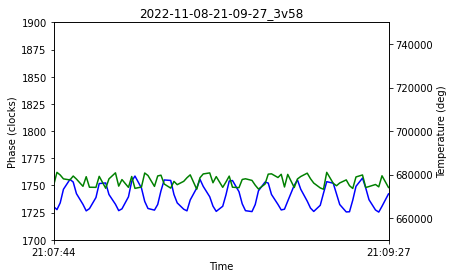

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1700,1900)
ax2.set_ylim(650000,750000)

ax2.plot(time1, df1["vpp_sum1"], color='g')
ax2.plot(time1, df1["vpp_sum2"], color='g')
ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')

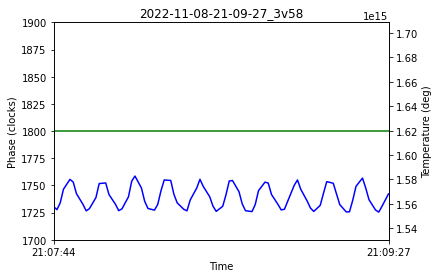

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1700,1900)
#ax2.set_ylim(650000,750000)

#ax2.plot(time1, df1["Ch1_word"], color='g')
ax2.plot(time1, df1["Ch2_word"], color='g')
ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')